# Challenge: Feedback analysis

Now that you've spent some time tinkering with an example Naive Bayes Classifier, it's time to build your own.

We've mentioned that Naive Bayes is particularly good for text classification problems. Before we made a spam filter. Now we'll perform a sentiment analysis, classifying whether feedback left on a website is either positive or negative.

Again the UCI Machine Learning database has a nice labeled dataset of sentiment labelled sentences for us to use. This dataset was created for the paper From Group to Individual Labels using Deep Features, Kotzias et. al., KDD 2015.

Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sklearn
import seaborn as sns
%matplotlib inline

In [3]:
amazon_cells_raw = pd.read_csv('amazon_cells_labelled.txt', '\t', header=None)
amazon_cells_raw.columns = ['text', 'sentiment']

In [19]:
## Python code to find the frequency of words
import re
import string
frequency = {}
document_text = open('amazon_cells_labelled.txt', 'r')
text_string = document_text.read().lower()
match_pattern = re.findall(r'\b[a-z]{3,15}\b', text_string)
 
for word in match_pattern:
    count = frequency.get(word,0)
    frequency[word] = count + 1
     
frequency_list = frequency.keys()
 
for words in frequency_list:
    print (words, frequency[words])

there 17
way 7
for 121
plug 11
here 4
the 519
unless 3
converter 1
good 77
case 29
excellent 27
value 5
great 99
jawbone 3
tied 1
charger 19
conversations 3
lasting 2
more 19
than 28
minutes 6
major 1
problems 12
mic 4
have 73
jiggle 1
get 22
line 5
right 12
decent 4
volume 12
you 71
several 7
dozen 1
hundred 1
contacts 3
then 17
imagine 1
fun 1
sending 4
each 1
them 13
one 41
are 42
razr 5
owner 1
must 4
this 208
needless 1
say 7
wasted 2
money 19
what 17
waste 14
and 311
time 27
sound 43
quality 49
was 90
very 104
impressed 9
when 22
going 6
from 33
original 5
battery 46
extended 2
two 14
were 4
seperated 1
mere 1
started 5
notice 2
excessive 1
static 3
garbled 1
headset 48
though 3
design 11
odd 1
ear 35
clip 4
not 117
comfortable 17
all 41
highly 9
recommend 26
any 20
who 3
has 34
blue 4
tooth 2
phone 168
advise 2
everyone 3
fooled 1
far 13
works 47
clicks 1
into 10
place 4
that 82
makes 11
wonder 1
how 9
long 13
mechanism 1
would 34
last 8
went 7
motorola 13
website 2
followed 1
d

wobbly 1
eventually 1
receive 1
seat 1
fulfills 1
requirements 1
fact 1
rests 1
lightly 1
against 1
websites 1
rating 1
cables 1
lap 1
controls 1
accessable 1
mine 1
christmas 1
rest 1
otherwise 1
joy 1
satisifed 1
wow 2
specs 1
armband 1
allot 1
clearer 1
keypads 1
reach 1
ericson 1
motor 1
control 1
center 1
voltage 1
humming 1
equipment 1
certain 1
places 1
girl 1
complain 1
wake 1
styling 1
restocking 1
fee 1
darn 1
lousy 1
seen 1
sweetest 1
securely 1
hook 1
directed 1
canal 1
unsatisfactory 1
videos 1
negatively 1
adapter 1
provide 1
hype 1
assumed 1
lense 1
covered 1
falls 1
text 1
messaging 1
tricky 1
painful 1
lasted 1
blew 1
flops 1
smudged 1
touches 1
disappoint 1
infra 1
port 1
irda 1


In [6]:
amazon_cells_raw.head()

,text,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [9]:
#Top 50 Keywords


keywords = ['phone','work','very','great','good','use','product','headset','quality','battery','sound','ear','one','well',
           'case','real','time','get','price','excellent','recommend','look','call','problem','did','buy','fit','nice','best',
           'service','charger','dissapoint','just','love','new','item','purchase','better','ever','money','chagre','car',
           'poor','bluetooth','becuase','bought','comfortable','easy','frist','reception']

#Columns to identify if keyword in review
for key in keywords:
    amazon_cells_raw[str(key)] = amazon_cells_raw.text.str.contains(
        str(key), 
        case=False
    )

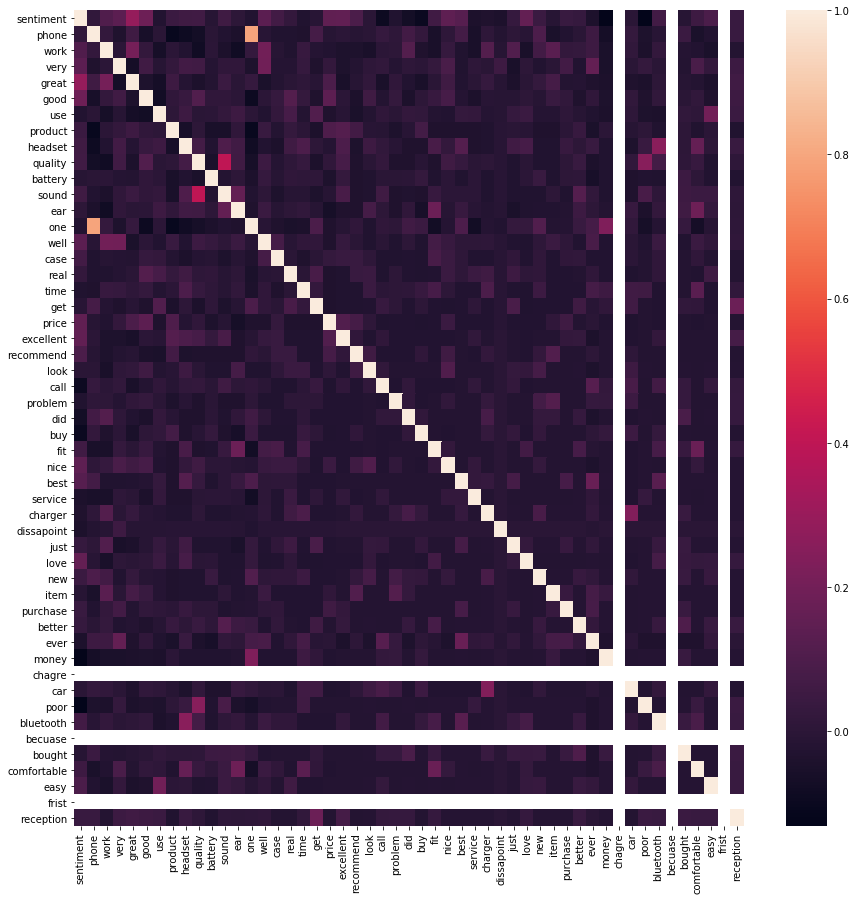

In [10]:
#Heatmap showing independence
plt.figure(figsize=(15, 15))
sns.heatmap(amazon_cells_raw.corr())

Most of the words show strong dependence with each other. 

In [12]:
# Setting x and y values
data = amazon_cells_raw[keywords]
target = amazon_cells_raw['sentiment']

In [13]:
# Our data is binary / boolean, therefore making use of the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 240


In [14]:
#Repeating with Yelp data

yelp = pd.read_csv('yelp_labelled.txt', '\t', header=None)
yelp.columns = ['text', 'sentiment']

#Columns to identify if keyword in review
for key in keywords:
    yelp[str(key)] = yelp.text.str.contains(
        str(key), 
        case=False
    )

#x and y values
data = yelp[keywords]
target = yelp['sentiment']

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 321


In [15]:
#Repeating with IMDB data

yelp = pd.read_csv('imdb_labelled.txt', '\t', header=None)
yelp.columns = ['text', 'sentiment']

#Columns to identify if keyword in review
for key in keywords:
    yelp[str(key)] = yelp.text.str.contains(
        str(key), 
        case=False
    )

#x and y values
data = yelp[keywords]
target = yelp['sentiment']

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 275


## Bayes

n probability theory and statistics, Bayes' theorem (alternatively Bayes' law or Bayes' rule) describes the probability of an event, based on prior knowledge of conditions that might be related to the event. https://en.wikipedia.org/wiki/Bayes%27_theorem

## Naive Bayes

In machine learning, naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features.
https://en.wikipedia.org/wiki/Naive_Bayes_classifier